# WeatherPy

---

## Analysis

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import requests
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List Using the citipy Library

In [2]:
# Empty list for holding the latitude adn longitude combinations

lat_lngs = []

# Empty list for holding the cities names

cities = []

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a out cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


----

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated

In [3]:
# Set the API base url

url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city

city_data = []

# Print to logger

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters

record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

for i,city in enumerate(cities):
# for city in cities:
    
    # Group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
        
    # Create endpoint URL with each city
    city_url = query_url + (city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    
    
    # Run an API request for each of the cities
    try:   
        # Parse the JSON and retrieve data
        city_weather=requests.get(city_url).json()
    
        # Parse out latitude,longitude,max temp,humidity,cloudiness, windspeed, country
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City":city,
                         "Lat":city_lat,
                          "Lng":city_lng,
                          "Max Temp":city_max_temp,
                          "Humidity":city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed":city_wind,
                          "Country":city_country,
                          "Date":city_date })
    
    # If an error is experienced, skip the city 
    except:
        print("City not found. Skipping...")
        pass        

# Indicate that Data Loading is complete
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | undurkhaan
Processing Record 2 of Set 1 | la passe
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | tazovsky
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | buala
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | kirakira
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | badger
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | leava
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | klyuchi
Processing Record 20 of Set 1 | trelleborg
Processing Record 21 of Set 1 | tsiombe
Processing Record 22 of Set 1 | penzance
P

Processing Record 37 of Set 4 | berezovyy
Processing Record 38 of Set 4 | pangai
Processing Record 39 of Set 4 | tromso
Processing Record 40 of Set 4 | rabo de peixe
Processing Record 41 of Set 4 | chonchi
Processing Record 42 of Set 4 | horta
Processing Record 43 of Set 4 | tarawa
Processing Record 44 of Set 4 | changji
Processing Record 45 of Set 4 | floro
Processing Record 46 of Set 4 | vilhena
Processing Record 47 of Set 4 | demyansk
Processing Record 48 of Set 4 | al ghayzah
Processing Record 49 of Set 4 | rudbar
Processing Record 0 of Set 5 | kijang
Processing Record 1 of Set 5 | san pedro
Processing Record 2 of Set 5 | sterling
Processing Record 3 of Set 5 | el maamoura
Processing Record 4 of Set 5 | guozhen
Processing Record 5 of Set 5 | ploneour-lanvern
Processing Record 6 of Set 5 | west busselton
City not found. Skipping...
Processing Record 7 of Set 5 | sirte
Processing Record 8 of Set 5 | port elizabeth
Processing Record 9 of Set 5 | new norfolk
Processing Record 10 of Set

Processing Record 27 of Set 8 | namie
Processing Record 28 of Set 8 | gallivare
City not found. Skipping...
Processing Record 29 of Set 8 | kem'
Processing Record 30 of Set 8 | alaghsas
Processing Record 31 of Set 8 | keflavik
Processing Record 32 of Set 8 | montepuez
Processing Record 33 of Set 8 | sur
Processing Record 34 of Set 8 | kulunda
Processing Record 35 of Set 8 | uturoa
Processing Record 36 of Set 8 | archangelos
Processing Record 37 of Set 8 | arno
Processing Record 38 of Set 8 | rio grande
Processing Record 39 of Set 8 | nantucket
Processing Record 40 of Set 8 | arar
Processing Record 41 of Set 8 | carnarvon
Processing Record 42 of Set 8 | fernie
Processing Record 43 of Set 8 | swan hill
Processing Record 44 of Set 8 | pionerskiy
Processing Record 45 of Set 8 | mar del plata
Processing Record 46 of Set 8 | pointe-noire
Processing Record 47 of Set 8 | hoylake
Processing Record 48 of Set 8 | muynoq
Processing Record 49 of Set 8 | puerto baquerizo moreno
Processing Record 0 o

Processing Record 16 of Set 12 | kas
Processing Record 17 of Set 12 | borger
Processing Record 18 of Set 12 | gorontalo
Processing Record 19 of Set 12 | puerto deseado
Processing Record 20 of Set 12 | onguday
Processing Record 21 of Set 12 | mananjary
Processing Record 22 of Set 12 | bakaly
Processing Record 23 of Set 12 | northam
Processing Record 24 of Set 12 | pindi bhattian
Processing Record 25 of Set 12 | bodaybo
Processing Record 26 of Set 12 | hobyo
Processing Record 27 of Set 12 | taro
Processing Record 28 of Set 12 | piti village
Processing Record 29 of Set 12 | richards bay
Processing Record 30 of Set 12 | luanda
Processing Record 31 of Set 12 | diamantino
Processing Record 32 of Set 12 | sinabang
Processing Record 33 of Set 12 | gizo
Processing Record 34 of Set 12 | luganville
Processing Record 35 of Set 12 | usinsk
Processing Record 36 of Set 12 | yambio
Processing Record 37 of Set 12 | weno
Processing Record 38 of Set 12 | sergeyevka
Processing Record 39 of Set 12 | panaba

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [5]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,undurkhaan,47.3194,110.6556,14.48,90,100,2.30,MN,1691440803
1,la passe,45.5549,-0.8967,20.13,75,2,4.41,FR,1691440928
2,adamstown,-25.0660,-130.1015,20.55,73,61,3.42,PN,1691440806
3,port-aux-francais,-49.3500,70.2167,4.46,83,100,15.62,TF,1691440523
4,tazovsky,67.4667,78.7000,12.65,79,11,3.02,RU,1691440847


In [6]:
# Export the City_Data into a csv

city_data_df.to_csv("cities.csv",index_label="City_ID")

In [7]:
# Read saved data

city_data_df=pd.read_csv("cities.csv",index_col="City_ID")

# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,undurkhaan,47.3194,110.6556,14.48,90,100,2.30,MN,1691440803
1,la passe,45.5549,-0.8967,20.13,75,2,4.41,FR,1691440928
2,adamstown,-25.0660,-130.1015,20.55,73,61,3.42,PN,1691440806
3,port-aux-francais,-49.3500,70.2167,4.46,83,100,15.62,TF,1691440523
4,tazovsky,67.4667,78.7000,12.65,79,11,3.02,RU,1691440847


### Create the Scatter Plot

In [8]:
# Define a function plot scatter plots:

def plot_scatter(y_axis, ylabel,title):

    plt.scatter(city_data_df["Lat"],y_axis,edgecolor ="black")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)

#### Latitude vs. Temperature

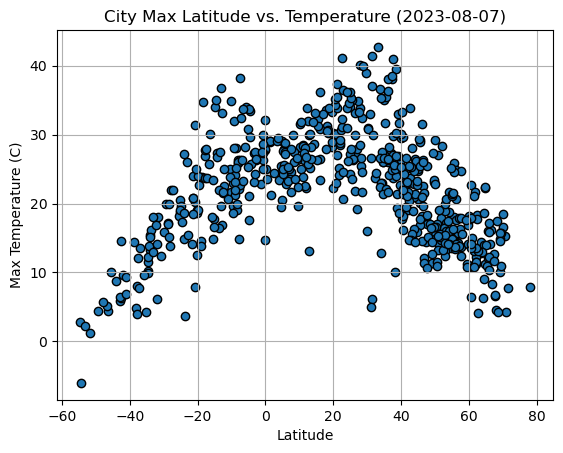

In [9]:
y_axis = city_data_df["Max Temp"]

plot_scatter(y_axis, "Max Temperature (C)","City Max Latitude vs. Temperature (%s)"%time.strftime("%Y-%m-%d"))
plt.savefig("Fig01.png")
plt.show()

#### Latitude vs. Humidity

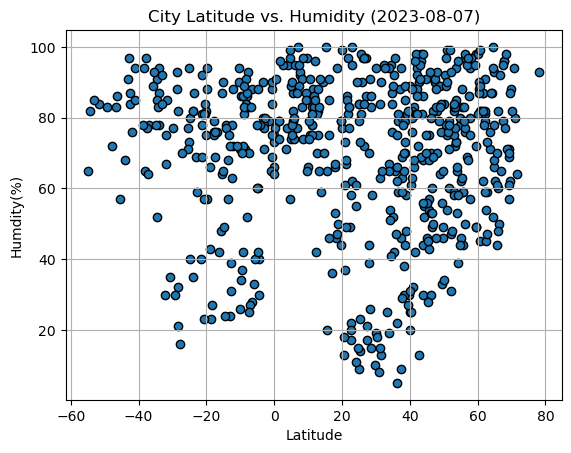

In [10]:
y_axis = city_data_df["Humidity"]

plot_scatter(y_axis, "Humdity(%)", "City Latitude vs. Humidity (%s)"%time.strftime("%Y-%m-%d"))

plt.savefig("Fig2.png")

plt.show()

#### Latitude vs. Cloudiness

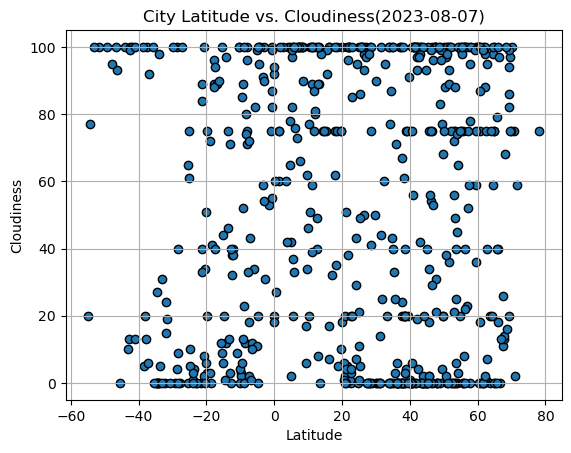

In [11]:
y_axis = city_data_df["Cloudiness"]

plot_scatter(y_axis, "Cloudiness", "City Latitude vs. Cloudiness(%s)"%time.strftime("%Y-%m-%d"))
plt.savefig("Fig3.png")
plt.show()

#### Latitude vs. Wind Speed

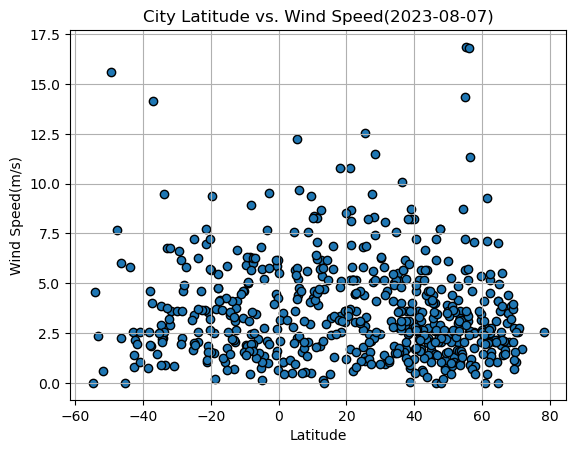

In [12]:
y_axis=city_data_df["Wind Speed"]

plot_scatter(y_axis, "Wind Speed(m/s)", "City Latitude vs. Wind Speed(%s)"%time.strftime("%Y-%m-%d"))
plt.savefig("Fig4.png")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,undurkhaan,47.3194,110.6556,14.48,90,100,2.30,MN,1691440803
1,la passe,45.5549,-0.8967,20.13,75,2,4.41,FR,1691440928
4,tazovsky,67.4667,78.7000,12.65,79,11,3.02,RU,1691440847
5,whitehorse,60.7161,-135.0538,22.67,45,75,4.12,CA,1691440765
6,anadyr,64.7500,177.4833,11.28,93,75,7.00,RU,1691440813


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df=city_data_df[city_data_df["Lat"] < 0]

# Display sample data

southern_hemi_df.head()                      

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,20.55,73,61,3.42,PN,1691440806
3,port-aux-francais,-49.3500,70.2167,4.46,83,100,15.62,TF,1691440523
7,buala,-8.1450,159.5921,26.29,86,96,2.45,SB,1691440929
9,kirakira,-10.4544,161.9205,25.08,90,100,3.27,SB,1691440852
13,blackmans bay,-43.0167,147.3167,5.85,91,10,2.54,AU,1691440810


In [15]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_axis, y_axis, ylabel, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis,y_axis)
    regress_values = x_axis * slope + intercept
    line_eq =  "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")
    
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color = "red")
    print(f"The r-value is : {rvalue}.")
    plt.show()
    

### Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.6462096691118566.


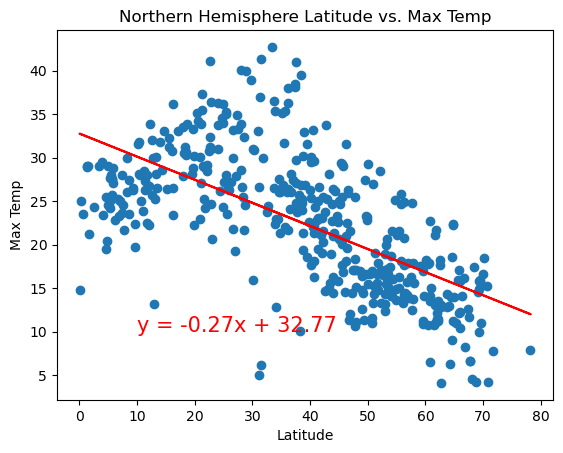

In [16]:
# Linear regression on Northern Hemisphere

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]

plot_linear_regression(x_axis,y_axis,"Max Temp","Northern Hemisphere Latitude vs. Max Temp",(10,10))



The r-value is : 0.813493680936734.


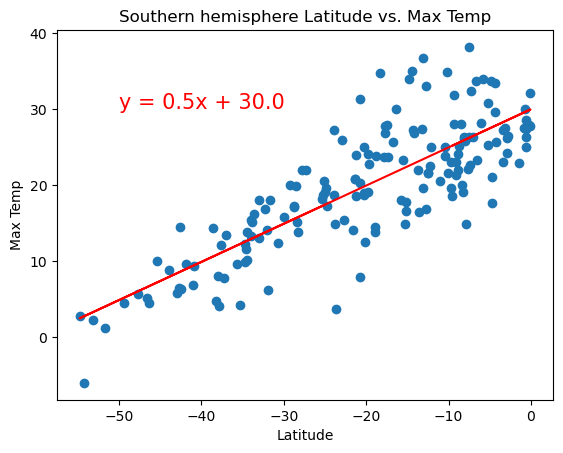

In [17]:
# Southern hemisphere

x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Max Temp"]

plot_linear_regression(x_axis,y_axis,'Max Temp',"Southern hemisphere Latitude vs. Max Temp",(-50,30))

**Discussion about the linear relationship:** For the Northern hemisphere Latitude vs Max Temp linear regression plot, we can conclude by looking at the r value which is _-0.646_ and the linear regression that Max temp adn latitude are negatively correalted.
While the opposite is true for southern hemisphere where r-value is _0.813_

### Humidity vs. Latitude Linear Regreesion Plot

The r-value is : 0.0010556850777693097.


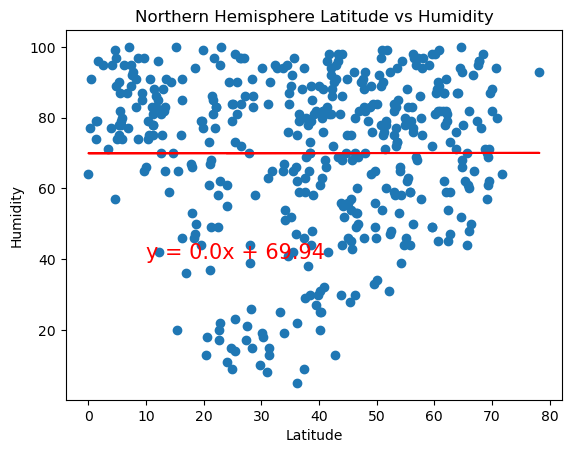

In [18]:
# Northern Hemisphere

x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Humidity"]

plot_linear_regression(x_axis,y_axis,"Humidity","Northern Hemisphere Latitude vs Humidity",(10,40))

The r-value is : -0.17921180714586998.


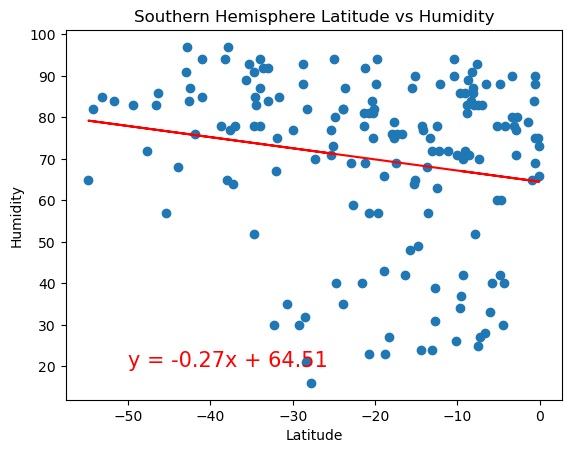

In [19]:
# Southern Hemisphere

x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Humidity"]

plot_linear_regression(x_axis,y_axis,"Humidity","Southern Hemisphere Latitude vs Humidity",(-50,20))

**Discussion about the linear relationship:** For the northern hemisphere, the r-value is _0.001_ and the linear regression line is nearly straight, so we can conclude that there is no relation between the humidity and latitude for the northern hemisphere.
for the southern hemisphere, the r-value is _-0.17_, the linear regression line has a tilt towards the right, hence we can conclude that there is a negative correlation between humidity and latitude in the southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : -0.07010327160354682.


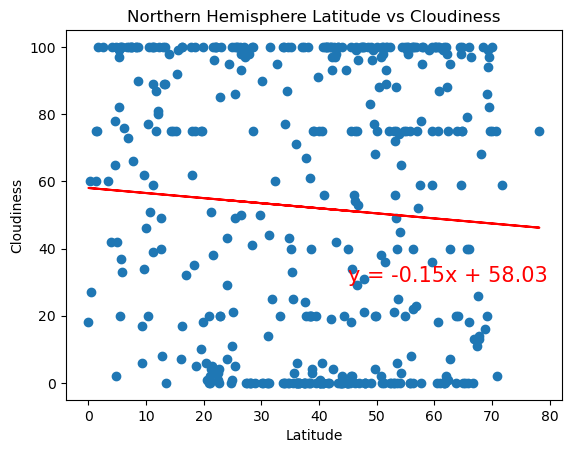

In [20]:
# Northern Hemisphere

x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Cloudiness"]

plot_linear_regression(x_axis,y_axis,"Cloudiness","Northern Hemisphere Latitude vs Cloudiness",(45,30))

The r-value is : 0.061309440264973536.


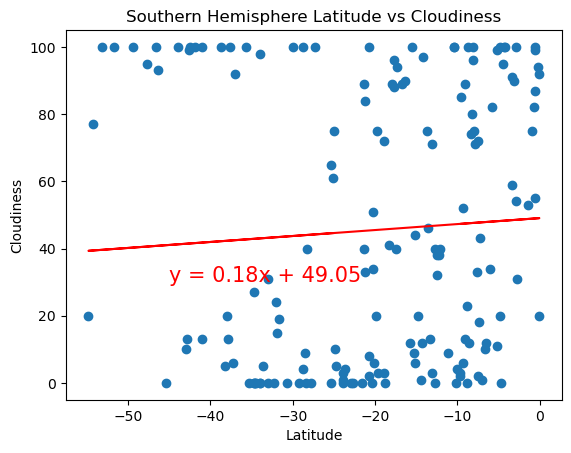

In [21]:
# Southern Hemisphere

x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Cloudiness"]

plot_linear_regression(x_axis,y_axis,"Cloudiness","Southern Hemisphere Latitude vs Cloudiness",(-45,30))

**Discussion about the linear relationship:** northern hemisphere: the r-value for cloudiness vs latitude is -_0.07_, and there is a slope downwards so we can say that there is a negative correlation.
southern hemisphere: as for the southern hemisphere, the r-value is _0.061_ and the slope is upwards hence there is a positive correlation between cloudiness and latitude in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : -0.1711117585359658.


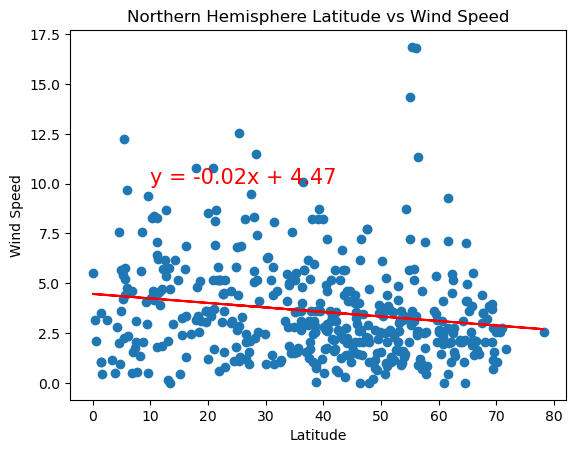

In [22]:
# Northern Hemisphere

x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Wind Speed"]

plot_linear_regression(x_axis,y_axis,"Wind Speed","Northern Hemisphere Latitude vs Wind Speed",(10,10))

The r-value is : 0.003929730172159095.


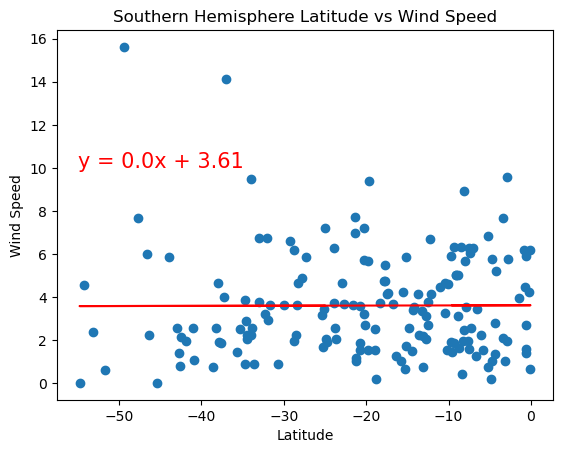

In [23]:
# Southern Hemisphere

x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Wind Speed"]

plot_linear_regression(x_axis,y_axis,"Wind Speed","Southern Hemisphere Latitude vs Wind Speed",(-55,10))

**Discussion about the linear relationship:** Northern hemisphere: the r-value is _-0.171_ and the slope is downwards. hence negative correlation.
southern hemisphere: r-value is _0.003_, linear regression has no slope, hence there is no correlation